# Mu-Star Analysis Plot

This notebooks has the plot presented on the mu-star telecon on Mar 22.

### Packages

In [1]:
import numpy as np
from libs.main import copacabana
from libs.make_input_files.make_input_datasets import make_master_file

import h5py
import matplotlib.pyplot as plt

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


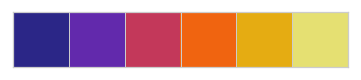

In [2]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [3]:
colorGradient = sns.color_palette("CMRmap")[:5]

In [4]:
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

### Loading Datasets

In [70]:
run_root  = ['bpz-{}','emuBPZ-{}','gauss003-{}','gauss005-{}']
pz_label  = ['BPZ'   ,'emuBPZ'   ,'gauss003'   ,'gauss005'     ]
z_window  = [0.03, 0.03, 0.05, 0.05]

run_rhod  = [runs.format('rhod') for runs in run_root]
run_r200  = [runs.format('r200') for runs in run_root]

In [131]:
cfg = 'libs/config_copa_dc2.yaml'
copa = copacabana(cfg)

def read_file(run_name,old=False):
    if old: run_name += '_old'
    cat   = copa.load_copa_out('cluster',run=run_name)
    return cat

def match_cats(cat1,cat2):
    cat2 = join(cat2,cat1['CID','M200_true','R200_true'],keys='CID')
#     idx, = np.where(np.in1d(cat1['CID'],cat2['CID']))
#     idx2,= np.where(np.in1d(cat2['CID'],cat1['CID']))
    
#     cat2['M200_true'] = np.ones_like(cat2['Ngals'])
#     cat2['R200_true'] = np.ones_like(cat2['Ngals'])
#     cat2['M200_true'][idx2] = cat1['M200_true'][idx]
#     cat2['R200_true'][idx2] = cat1['R200_true'][idx]
    
    return cat1, cat2

def header(name):
    print('\n'+name)

In [132]:
data_rhod,data_rhod_old = [],[]
for run, label in zip(run_rhod,pz_label):
    header('Loading: '+run)
    cat1 = read_file(run)
    cat2 = read_file(run, old=True)
    cat1,cat2 = match_cats(cat1,cat2)
    
    if 'MU_TRUE' not in cat1.colnames:
        print('mu-star missing in copa')
    
    if 'MU_TRUE' not in cat2.colnames:
        print('mu-star missing in old')
    
    data_rhod.append(cat1)
    data_rhod_old.append(cat2)


Loading: bpz-rhod

Loading: emuBPZ-rhod

Loading: gauss003-rhod

Loading: gauss005-rhod


In [133]:
data_r200,data_r200_old = [],[]
for run, label in zip(run_r200,pz_label):
    header('Loading: '+run)
    cat1 = read_file(run)
    cat2 = read_file(run, old=True)
    cat1,cat2 = match_cats(cat1,cat2)
    
    if 'MU_TRUE' not in cat1.colnames:
        print('mu-star missing in copa')
    
    if 'MU_TRUE' not in cat2.colnames:
        print('mu-star missing in old')
    
    
    data_r200.append(cat1)
    data_r200_old.append(cat2)


Loading: bpz-r200

Loading: emuBPZ-r200

Loading: gauss003-r200

Loading: gauss005-r200


In [134]:
ylabel    = r'$\left( \mu_{\star}/\mu_{\star}^{True} \right)$'

In [135]:
data_rhod_zfile = []
for run in run_rhod:
    cat2 = read_file(run+'_zfile_old')
    cat1,cat2 = match_cats(cat1,cat2)
    data_rhod_zfile.append(cat2)

### Checking Plots

#### Plot 1: $R_{200}$ vs $R_{200,true}$

Check if the R200 is the True one

Text(0.5,0,'$M_{200}$')

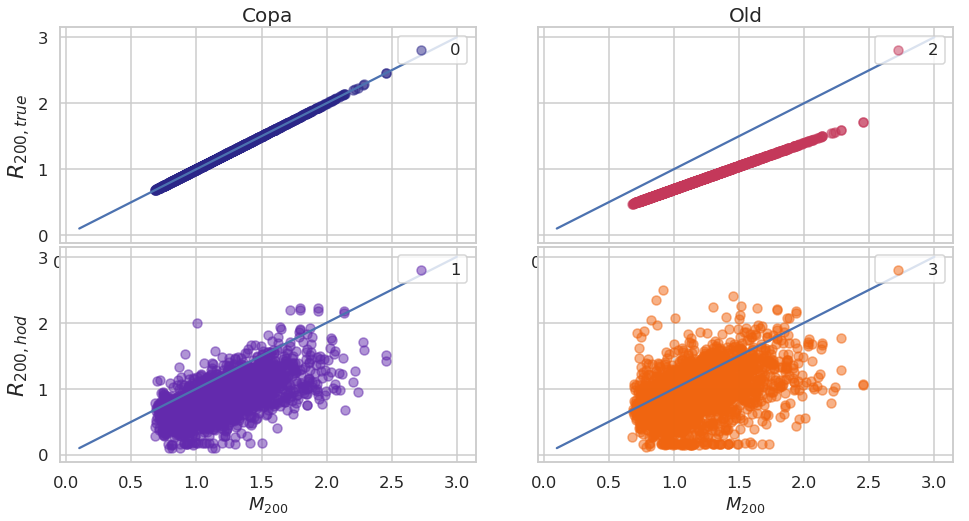

In [136]:
xlabel=r'$M_{200}$'
ylabel1=r'$R_{200,true}$'
ylabel2=r'$R_{200,hod}$'
fig, ax = plt.subplots(2, 2, sharey='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.15)

ax = ax.flatten(order='F')

datas = [data_r200[0],data_rhod[2],data_r200_old[0],data_rhod_zfile[0]]
i=0
for d,color in zip(datas,colorGradient):
    ax[i].plot(rvec,rvec)
    ax[i].scatter(d['R200_true'],d['R200'],label=i,color=color,alpha=0.5)
    ax[i].legend(loc=1)
    i+=1
ax[0].set_title('Copa',fontsize=20)
ax[2].set_title('Old',fontsize=20)
ax[0].set_ylabel(ylabel1,fontsize=22)
ax[1].set_ylabel(ylabel2,fontsize=22)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)

(0.2, 2.6)

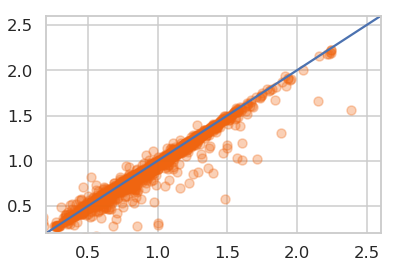

In [137]:
r200o = data_rhod_old[2]['R200']
r200c = data_rhod[2]['R200']

rvec = np.linspace(0.1,3.,100)
plt.plot(rvec,rvec)
plt.scatter(r200o, r200c, c=color, alpha=0.3)
plt.xlim(0.2,2.6)
plt.ylim(0.2,2.6)


#### Plot 2: $N_{200}$ vs $M_{200,true}$

Check the richness relation

Text(0.5,0,'$M_{200}$')

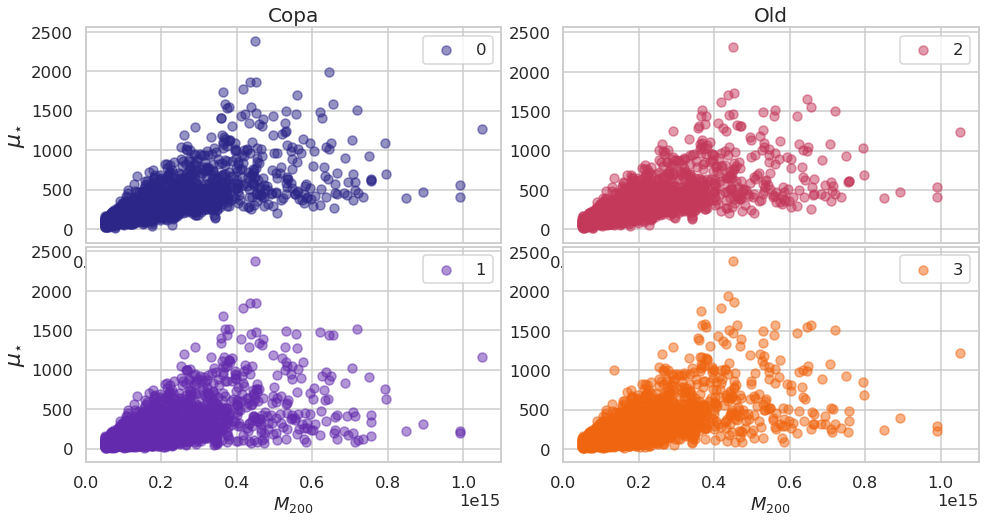

In [138]:
xlabel=r'$M_{200}$'
ylabel=r'$\mu_{\star}$'
fig, ax = plt.subplots(2, 2, sharey='col', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.15)

ax = ax.flatten(order='F')

datas = [data_r200[0],data_rhod[0],data_r200_old[0],data_rhod_old[0]]

i=0
for d,color in zip(datas, colorGradient):
    ax[i].scatter(d['M200_true'],d['MU_TRUE'],label=i,color=color,alpha=0.5)
    ax[i].legend(loc=1)
    i+=1
ax[0].set_title('Copa',fontsize=20)
ax[2].set_title('Old',fontsize=20)
ax[0].set_ylabel(ylabel,fontsize=22)
ax[1].set_ylabel(ylabel,fontsize=22)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)

Text(0.5,0,'$N_{200,true}$')

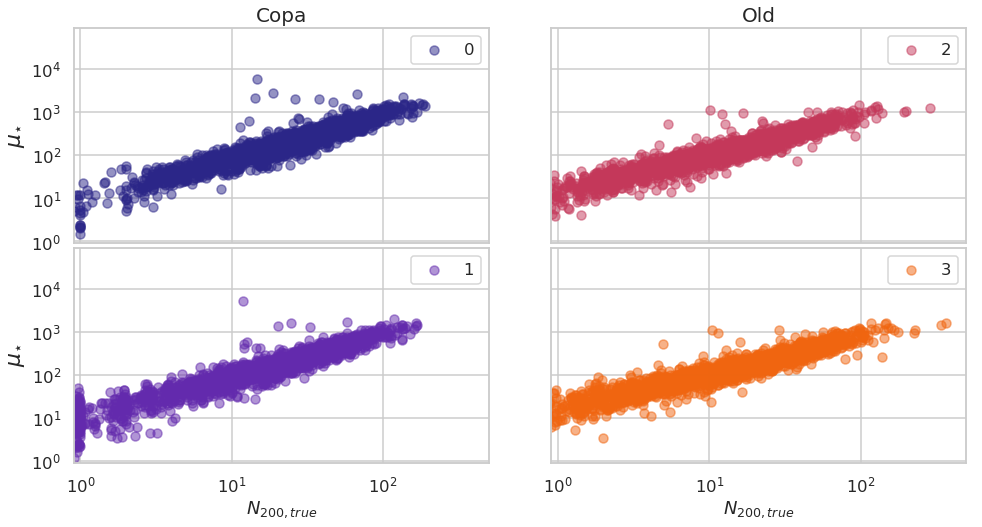

In [139]:
xlabel=r'$N_{200,true}$'
ylabel=r'$\mu_{\star}$'
fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.15)

ax = ax.flatten(order='F')

datas = [data_r200[0],data_rhod[0],data_r200_old[0],data_rhod_old[0]]

i=0
for d,color in zip(datas, colorGradient):
    ax[i].scatter(d['Ngals'],d['MU'],label=i,color=color,alpha=0.5)
    ax[i].legend(loc=1)
    i+=1

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylim(0.9,90000)
ax[0].set_xlim(0.9,500)
ax[0].set_title('Copa',fontsize=20)
ax[2].set_title('Old',fontsize=20)
ax[0].set_ylabel(ylabel,fontsize=22)
ax[1].set_ylabel(ylabel,fontsize=22)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)

In [140]:
sns.set_context("talk")

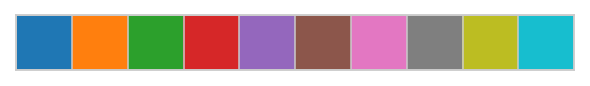

In [141]:
cgrad2= sns.color_palette("tab10")[:4]
sns.palplot(sns.color_palette("tab10"))

### Comparing

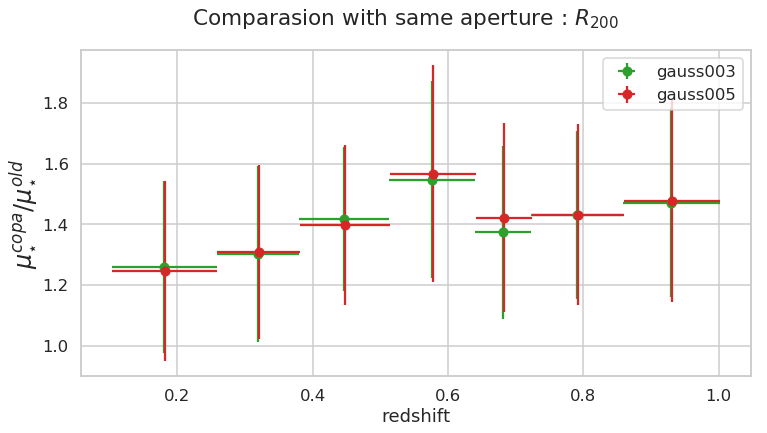

In [142]:
xlabel=r'redshift'
ylabel= r'$ \mu_{\star}^{copa}/\mu_{\star}^{old}$'

fig, ax = plt.subplots(1, 1, sharey='all', sharex='all', figsize=(12,6))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

# ax    = ax.flatten(order='F')

i=0
for d1, d2, run, label, color in zip(data_r200,data_r200_old,run_rhod,pz_label,cgrad2):
    if i>1:
        plot_frac_error(i*0.001+d1['redshift'],d1['MU'],d2['MU'], d1['MU_ERR_JK'], d2['MU_ERR_JK'], ax=ax, co=color,label=label)
    #ax[i].legend()
    i+=1
ax.legend()
# ax.set_ylim(-0.2,3.8)
ax.set_ylabel(ylabel,fontsize=24)
ax.set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Comparasion with same aperture : $R_{200}$')
plt.savefig('graphs/comparasion_ratio_evolution_gauss_pz_w_r200_aperture.png')

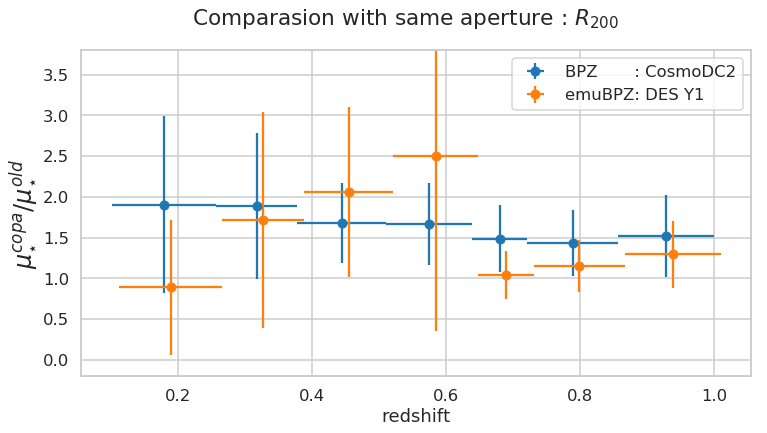

In [143]:
xlabel=r'redshift'
ylabel= r'$\mu_{\star}^{copa}/\mu_{\star}^{old}$'

fig, ax = plt.subplots(1, 1, sharey='all', sharex='all', figsize=(12,6))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

# ax    = ax.flatten(order='F')
labels = ['BPZ       : CosmoDC2','emuBPZ: DES Y1',None,None]
i=0
for d1, d2, run, label, color in zip(data_r200,data_r200_old,run_rhod,labels,cgrad2):
    if i<2:
        plot_frac_error(i*0.01+d1['redshift'],d1['MU'],d2['MU'], d1['MU_ERR_JK'], d2['MU_ERR_JK'], ax=ax, co=color,label=label)
    #ax[i].legend()
    i+=1
ax.legend()
ax.set_ylim(-0.2,3.8)
ax.set_ylabel(ylabel,fontsize=24)
ax.set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Comparasion with same aperture : $R_{200}$')
plt.savefig('graphs/comparasion_ratio_evolution_bpz_pz_w_r200_aperture.png')

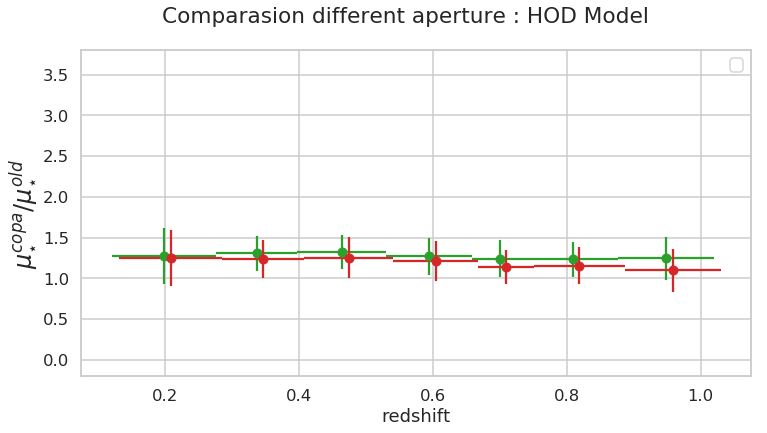

In [144]:
xlabel=r'redshift'
ylabel= r'$\mu_{\star}^{copa}/\mu_{\star}^{old}$'

fig, ax = plt.subplots(1, 1, sharey='all', sharex='all', figsize=(12,6))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

# ax    = ax.flatten(order='F')
labels = ['BPZ       : CosmoDC2','emuBPZ: DES Y1',None,None]
i=0
for d1, d2, run, label, color in zip(data_rhod,data_rhod_old,run_rhod,labels,cgrad2):
    if i>1:
        plot_frac_error(i*0.01+d1['redshift'],d1['Ngals'],d2['Ngals'], d1['MU_ERR_JK'], d2['MU_ERR_JK'], ax=ax, co=color,label=label)
    #ax[i].legend()
    i+=1
ax.legend()
ax.set_ylim(-0.2,3.8)
ax.set_ylabel(ylabel,fontsize=24)
ax.set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Comparasion different aperture : HOD Model')
plt.savefig('graphs/comparasion_ratio_evolution_bpz_pz_w_rhod_aperture.png')

Text(0.5,0.98,'Comparasion different aperture : HOD Model ')

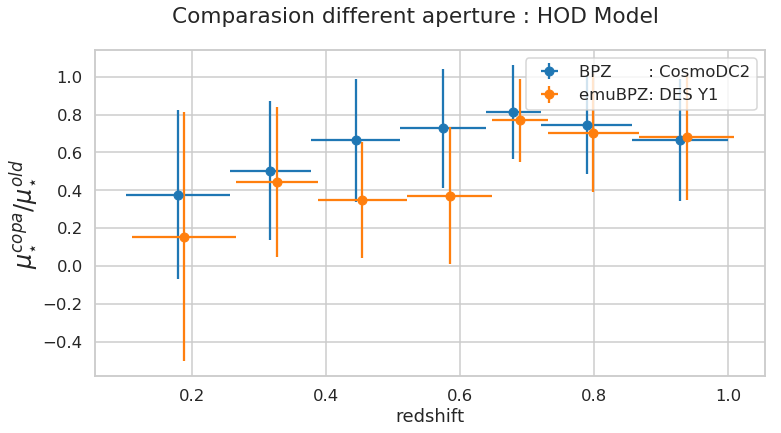

In [146]:
xlabel=r'redshift'
ylabel= r'$\mu_{\star}^{copa}/\mu_{\star}^{old}$'

fig, ax = plt.subplots(1, 1, sharey='all', sharex='all', figsize=(12,6))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

# ax    = ax.flatten(order='F')
labels = ['BPZ       : CosmoDC2','emuBPZ: DES Y1',None,None]
i=0
for d1, d2, run, label, color in zip(data_rhod,data_rhod_zfile,run_rhod,labels,cgrad2):
    if i<2:
        plot_frac_error(i*0.01+d1['redshift'],d1['Ngals'],d2['Ngals'],0.*d1['MU_ERR_JK'], 0.*d2['MU_ERR_JK'], ax=ax, co=color,label=label)
    #ax[i].legend()
    i+=1
ax.legend()
# ax.set_ylim(-0.2,3.8)
ax.set_ylabel(ylabel,fontsize=24)
ax.set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Comparasion different aperture : HOD Model ')
# plt.savefig('graphs/comparasion_ratio_evolution_bpz_pz_w_rhod_aperture.png')

In [97]:
zsigma_file = '/data/des30.a/data/bwelch/redmapper_y1a1/bpz_median_z_sigma.txt'

### Copacabana Results

Text(0.5,0.98,'Copacabana : $R_{HOD}$ method ')

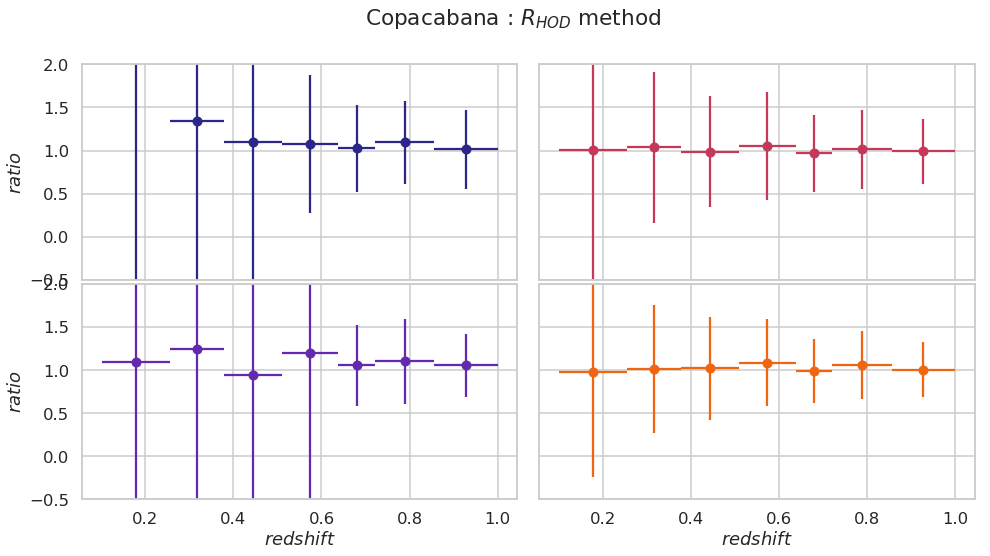

In [147]:
xlabel=r'$redshift$'
ylabel=r'$ratio$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0
for d, run, label, color in zip(data_rhod,run_rhod,pz_label,colorGradient):
    plot_frac_error(d['redshift'],d['Nbkg'],1.*d['Nbkg_true'], 0.*d['Ngals'], 0.*d['Ngals'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
#     ax[i].legend()
    i+=1

# ax[0].set_xscale('log')
# ax[0].set_ylim(-0.1,2.1)
ax[0].set_ylim(-.5,2.)
ax[0].set_ylabel(ylabel,fontsize=18)
ax[1].set_ylabel(ylabel,fontsize=18)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Copacabana : $R_{HOD}$ method ')

Text(0.5,0.98,'Copacabana : $R_{HOD}$ method ')

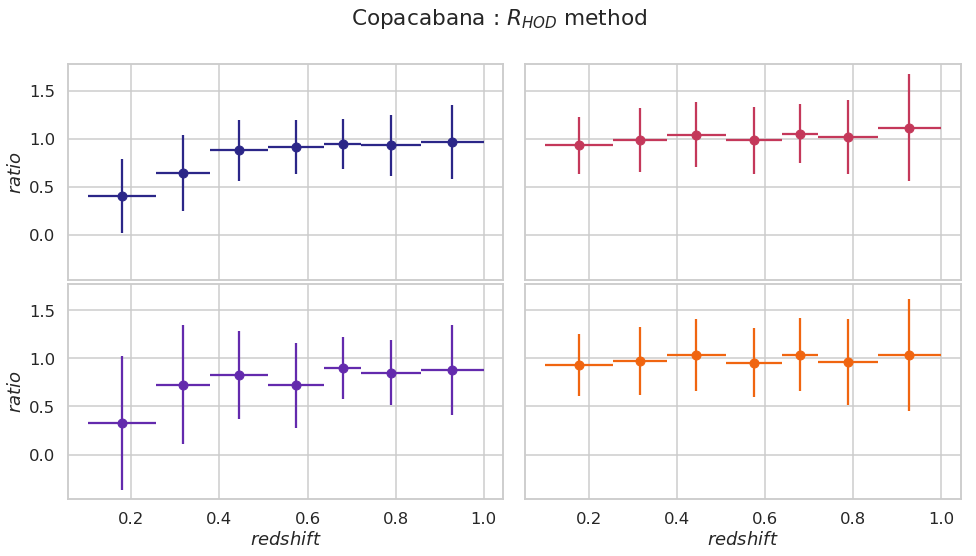

In [154]:
xlabel=r'$redshift$'
ylabel=r'$ratio$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0
for d, run, label, color in zip(data_rhod,run_rhod,pz_label,colorGradient):
#     plot_frac_error(d['redshift'],d['MU'],d['MU_TRUE'], d['MU_ERR_JK'], d['MU_TRUE_ERR_JK'], ax=ax[i], co=color,label=label)
    plot_frac_error(d['redshift'],d['Ngals'],1.*d['Ngals_true'], 0.*d['MU_ERR_JK'], 0.*d['MU_TRUE_ERR_JK'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
#     ax[i].legend()
    i+=1

# ax[0].set_xscale('log')
# ax[0].set_ylim(-0.1,2.1)
# ax[0].set_ylim(-0.1,2.1)
ax[0].set_ylabel(ylabel,fontsize=18)
ax[1].set_ylabel(ylabel,fontsize=18)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Copacabana : $R_{HOD}$ method ')

Text(0.5,0.98,'Copacabana : $R_{200}$ method ')

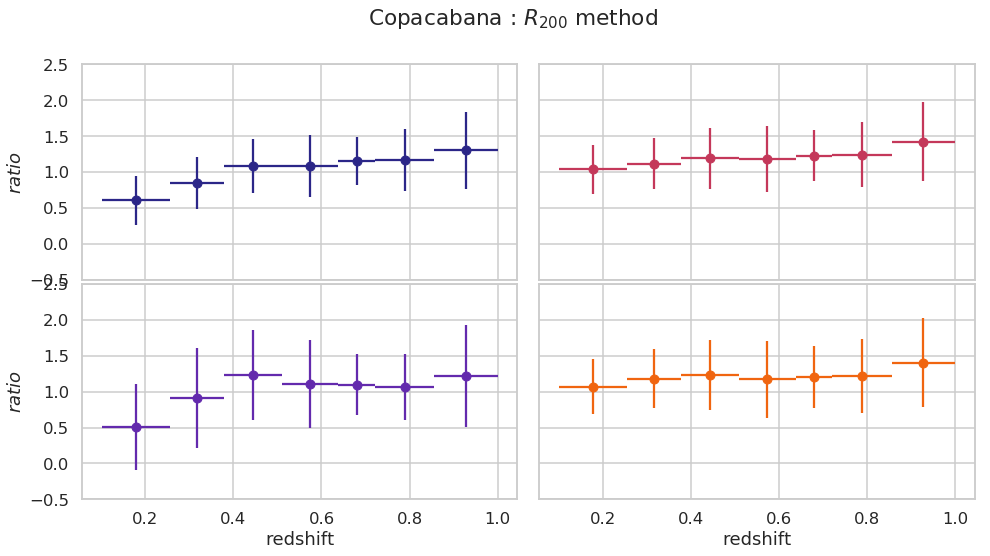

In [149]:
xlabel=r'redshift'
ylabel=r'$ratio$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0
for d, run, label, color in zip(data_r200,run_rhod,pz_label,colorGradient):
    plot_frac_error(d['redshift'],d['Ngals'],1.*d['Ngals_true'], 0.*d['Ngals'], 0.*d['Ngals'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
#     ax[i].legend()
    i+=1

# ax[0].set_xscale('log')
ax[0].set_ylim(-.5,2.5)
ax[0].set_ylabel(ylabel,fontsize=18)
ax[1].set_ylabel(ylabel,fontsize=18)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Copacabana : $R_{200}$ method ')

Text(0.5,0.98,'Copacabana : $R_{200}$ ')

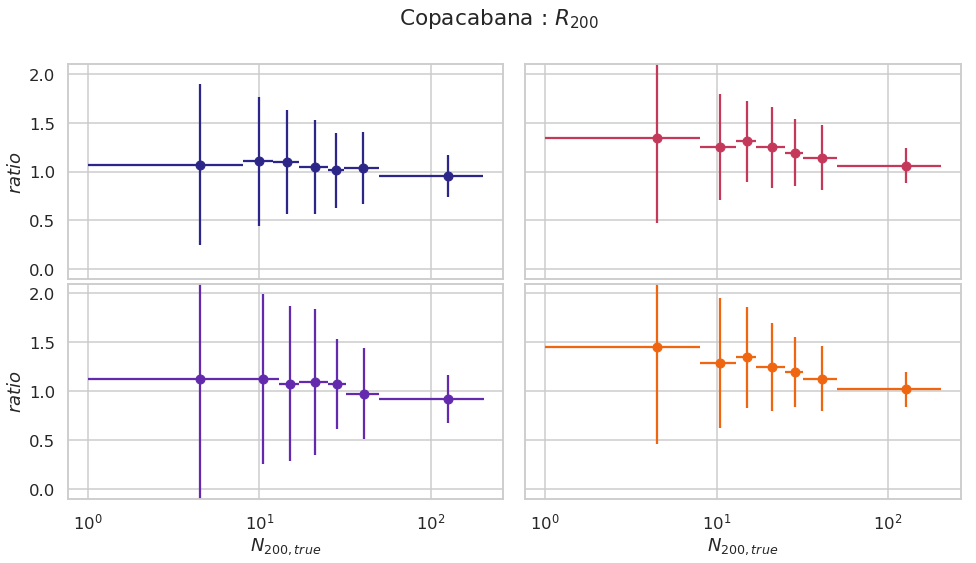

In [150]:
xlabel=r'$N_{200,true}$'
ylabel=r'$ratio$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0
for d, run, label, color in zip(data_r200,run_rhod,pz_label,colorGradient):
    plot_frac_error(d['Ngals_true'],d['Ngals'],1.*d['Ngals_true'], 0.*d['Ngals'], 0.*d['Ngals'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
#     ax[i].legend()
    i+=1

# ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylim(-0.1,2.1)
# ax[0].set_xlim(0.9,300)
ax[0].set_ylabel(ylabel,fontsize=18)
ax[1].set_ylabel(ylabel,fontsize=18)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Copacabana : $R_{200}$ ')

Text(0.5,0.98,'Old Membership Assignment : $R_{hod}$ ')

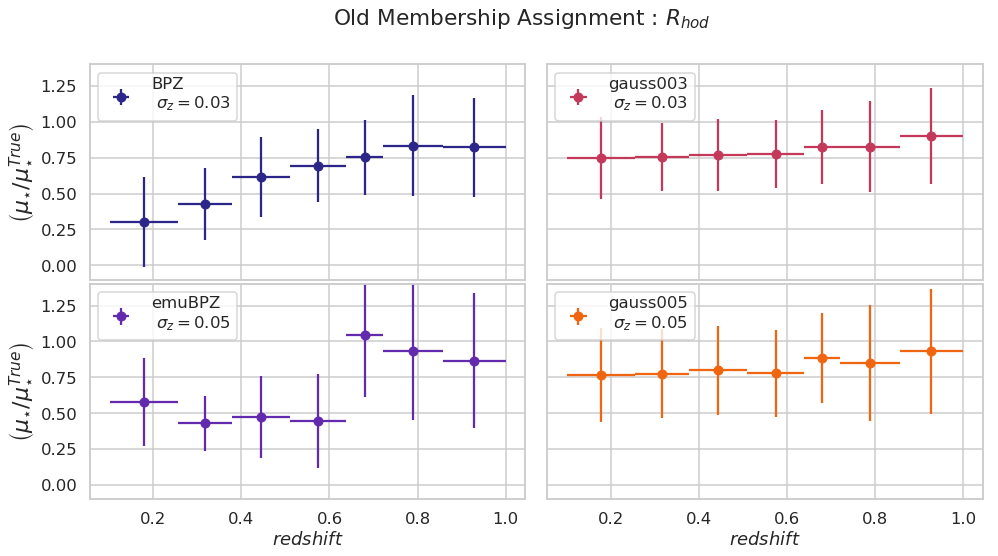

In [151]:
xlabel=r'$redshift$'
ylabel    = r'$\left( \mu_{\star}/\mu_{\star}^{True} \right)$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0

zwindows = [0.03,0.05,0.03,0.05]
for d, run, label, color in zip(data_rhod_old,run_rhod,pz_label,colorGradient):
    label += '\n'+r' $\sigma_{z} = %.2f$'%(zwindows[i])
    plot_frac_error(d['redshift'],d['Ngals'],d['Ngals_true'], d['MU_ERR_JK'], d['MU_TRUE_ERR_JK'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
    ax[i].legend(loc=2)
    i+=1

# ax[0].set_yscale('log')
# ax[0].set_xscale('log')
ax[0].set_ylim(-0.1,1.4)
# ax[0].set_xlim(0.9,300)
ax[0].set_ylabel(ylabel,fontsize=22)
ax[1].set_ylabel(ylabel,fontsize=22)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Old Membership Assignment : $R_{hod}$ ')

Text(0.5,0.98,'Old Membership Assignment : $R_{hod}$ ')

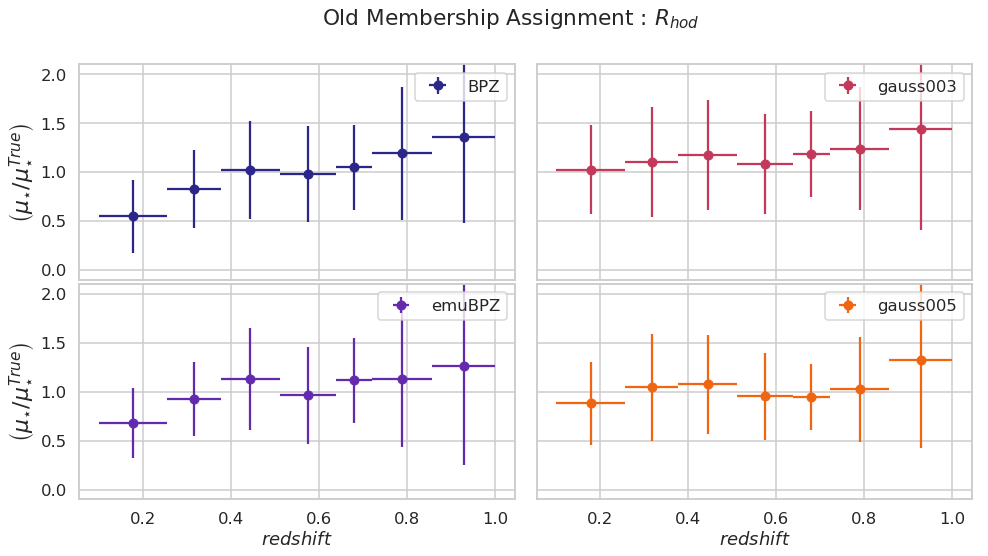

In [152]:
xlabel=r'$redshift$'
ylabel    = r'$\left( \mu_{\star}/\mu_{\star}^{True} \right)$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')
nvec = np.arange(0.9,300,1)
i=0

zwindows = [0.03,0.05,0.03,0.05]
for d, run, label, color in zip(data_rhod_zfile,run_rhod,pz_label,colorGradient):
    #label += '\n'+r' $\sigma_{z} = %.2f$'%(zwindows[i])
    plot_frac_error(d['redshift'],d['Ngals'],1.*d['Ngals_true'], d['MU_ERR_JK'], d['MU_TRUE_ERR_JK'], ax=ax[i], co=color,label=label)
#     ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.5)
    ax[i].legend()
    i+=1

# ax[0].set_yscale('log')
# ax[0].set_xscale('log')
ax[0].set_ylim(-0.1,2.1)
# ax[0].set_xlim(0.9,300)
ax[0].set_ylabel(ylabel,fontsize=22)
ax[1].set_ylabel(ylabel,fontsize=22)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Old Membership Assignment : $R_{hod}$ ')

### Old Membership Results

Text(0.5,0.98,'Old Memb. : $R_{HOD}$ method')

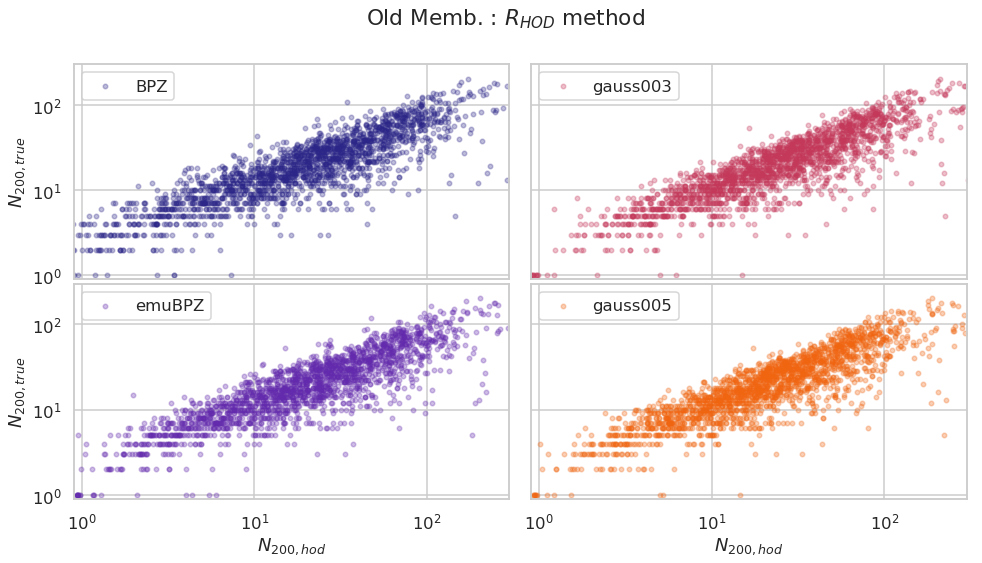

In [62]:
xlabel=r'$N_{200,hod}$'
ylabel=r'$N_{200,true}$'

fig, ax = plt.subplots(2, 2, sharey='all', sharex='all', figsize=(16,8))
fig.subplots_adjust(hspace=0.02,wspace=0.05)

ax = ax.flatten(order='F')

i=0
for d, run, label, color in zip(data_rhod_zfile,run_rhod,pz_label,colorGradient):
    ax[i].scatter(d['Ngals'],d['Ngals_true'],label=label,color=color,alpha=0.3,s=20)
    ax[i].legend()
    i+=1

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylim(0.9,300)
ax[0].set_xlim(0.9,300)
ax[0].set_ylabel(ylabel,fontsize=18)
ax[1].set_ylabel(ylabel,fontsize=18)
ax[1].set_xlabel(xlabel,fontsize=18)
ax[3].set_xlabel(xlabel,fontsize=18)
plt.suptitle(r'Old Memb. : $R_{HOD}$ method')

### Auxialiry Functions

In [19]:
def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

def splitBins(var):
    nmin = np.nanmin(var)
    n1 = np.percentile(var,10)
    n2 = np.percentile(var,20)
    n3 = np.percentile(var,30)
    n4 = np.percentile(var,40)
    n5 = np.percentile(var,50)
    n6 = np.percentile(var,60)
    n7 = np.percentile(var,70)
    n8 = np.percentile(var,80)
    n9 = np.percentile(var,90)
    nmax = np.max(var)
    
    return np.array([nmin,n1,n2,n3,n4,n5,n6,n7,n8,n9,nmax])


def splitBins6(var):
    nmin = np.nanmin(var)
    n1 = np.percentile(var,15)
    n2 = np.percentile(var,30)
    n3 = np.percentile(var,45)
    n4 = np.percentile(var,60)
    n5 = np.percentile(var,70)
    n6 = np.percentile(var,85)
    nmax = np.max(var)
    
    return np.array([nmin,n1,n2,n3,n4,n5,n6,nmax])

In [18]:
import scipy
def compute_fractional_error(x,y,errx,erry,eps=1e-9):
    y    += eps
    z     = (x/y)
    errz  = z*np.sqrt((errx/(x+eps))**2+(erry/y)**2)
    return errz

def sigma68(x):
    xlo = np.nanpercentile(x,16)
    xhi = np.nanpercentile(x,84)
    return (xhi-xlo)/2

def plot_frac_error(xvar,yvar1,yvar2, err1, err2, ax=None, co='r',label=None, xbins=None):
    if ax is None: ax = plt.axes()
    
    if xbins is None:
        xbins = splitBins6(xvar)
    
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2
    
    eps = 1e-9
    residual = (yvar1/(yvar2+eps))
    zerr = compute_fractional_error(yvar1,yvar2,err1,err2)
    
    residualb = np.array([np.nanmedian(residual[idx]) for idx in keys])
    residualb_std = np.sqrt(np.array([sigma68(residual[idx])**2+np.nanmedian(zerr)**2 for idx in keys]))
    residualb_std2 = np.sqrt(np.array([sigma68(residual[idx])**2 for idx in keys]))
    
    rho = scipy.stats.pearsonr(xvar, residual)
    
#     ax.errorbar(xvar,residual,yerr=zerr,color=color,alpha=0.25,fmt='o')
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std2,color=co,fmt='o',label=label)

def plot_residual(xvar,yvar1,yvar2, err1, err2, ax=None, co='r',label=None, xbins=None):
    if ax is None: ax = plt.axes()
    
    if xbins is None:
        xbins = splitBins6(xvar)
    
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2
    
    residual = (yvar1-yvar2)
    zerr     = (err1**2+err2**2)**(1/2)
    
    residualb = np.array([np.nanmedian(residual[idx]) for idx in keys])
    residualb_std = np.sqrt(np.array([sigma68(residual[idx])**2+np.nanmedian(zerr)**2 for idx in keys]))
    residualb_std2 = np.sqrt(np.array([sigma68(residual[idx])**2 for idx in keys]))
    
    rho = scipy.stats.pearsonr(xvar, residual)
    
    #ax.errorbar(xvar,residual,yerr=zerr,color=color,alpha=0.25,fmt='o')
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color=co,fmt='o',label=label)

def plot_log_residual(xvar,yvar1,yvar2, err1, err2, ax=None, co='r',label=None, xbins=None):
    if ax is None: ax = plt.axes()
    
    if xbins is None:
        xbins = splitBins6(xvar)
    
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2

    residual = np.log10(yvar1)-np.log10(yvar2)
    #zerr = compute_fractional_error(yvar1,yvar2,err1,err2)
    
    residualb = np.array([np.nanmedian(residual[idx]) for idx in keys])
    #residualb_std = np.sqrt(np.array([sigma68(residual[idx])**2+np.nanmedian(zerr)**2 for idx in keys]))
    residualb_std2 = np.sqrt(np.array([sigma68(residual[idx])**2 for idx in keys]))
    
    rho = scipy.stats.pearsonr(xvar, residual)
    
    #ax.errorbar(xvar,residual,yerr=zerr,color=color,alpha=0.25,fmt='o')
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std2,color=co,fmt='o',label=label)


In [4]:
def plot_scaling_relation(ngals,nt,title='Buzzard'):
    #nt_bins = splitBins(nt)
    nt_bins= np.logspace(np.nanmin(np.log10(nt)),np.nanmax(np.log10(nt)),12)
    keys, ntb = makeBins(nt,nt_bins)
    ntb_std = np.diff(nt_bins)/2
    
    ngalsb = np.array([np.mean(ngals[idx]) for idx in keys])
    ngalsb_std = np.array([np.std(ngals[idx]) for idx in keys])
    
    ## linear fit
    linreg=lin_reg(nt,ngals)
    
    idx = np.argsort(nt)
    xt,yh = nt[idx],linreg['Yhat'][idx]

    b0 = round(linreg['b0'],3)
    b1 = round(linreg['b1'],3)
    cb_u, cb_l = linreg['cb_u'], linreg['cb_l']


    fig = plt.figure(figsize=(10,8))
    
    sc = plt.scatter(nt,ngals,s=75, alpha=0.25, color=gray)#,label='$scatter = %.1f$'%(np.std(ngals-nt))
    plt.errorbar(ntb,ngalsb,xerr=ntb_std,yerr=ngalsb_std,color=blue,linewidth=2.,fmt='o')
    
#     plt.plot(xt,yh, color="r",label='y=%.2f+%.2fx'%(b0,b1))
#     plt.fill_between(xt, cb_l, cb_u, color="gray", alpha=0.25, label='_nolabel_')
#     plt.plot(xt,cb_l, color="r", label='_nolabel_')
#     plt.plot(xt,cb_u, color="r", label='_nolabel_')

#     plt.scatter(nt,ngals2,alpha=0.2)
    plt.plot(np.linspace(1,900),np.linspace(1,900),linestyle='--',color='r')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1,900)
    plt.xlim(1,900)
    plt.xlabel(r'$N_{true}$',fontsize=22)
    plt.ylabel(r'$N_{obs}$',fontsize=22)
    plt.legend(fontsize=14)
    plt.title(title,fontsize=22)
    fig.tight_layout()
    
def lin_reg(X,Y):
    barX=np.mean(X); barY=np.mean(Y)
    XminusbarX=X-barX; YminusbarY=Y-barY
    b1=sum(XminusbarX*YminusbarY)/sum(XminusbarX**2)
    b0=barY-b1*barX
    Yhat=b0+b1*X
    e_i=Y-Yhat
    sse=np.sum(e_i**2)
    ssr=np.sum((Yhat-barY )**2)
    n=len(X)
    MSE=sse/np.float(n-2)

    s_of_yh_hat=np.sqrt(MSE*(1.0/n+(X-barX)**2/sum(XminusbarX**2)))
    W=np.sqrt(2.0*st.f.ppf(0.95,2,n-2))

    cb_upper=Yhat+W*s_of_yh_hat
    cb_lower=Yhat-W*s_of_yh_hat
    idx=np.argsort(X)

    return {'Yhat':Yhat,'b0':b0,'b1':b1,'cb_u':cb_upper[idx], 'cb_l': cb_lower[idx]}

In [119]:
def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

def splitBins(var):
    nmin = np.nanmin(var)
    n1 = np.percentile(var,10)
    n2 = np.percentile(var,20)
    n3 = np.percentile(var,30)
    n4 = np.percentile(var,40)
    n5 = np.percentile(var,50)
    n6 = np.percentile(var,60)
    n7 = np.percentile(var,70)
    n8 = np.percentile(var,80)
    n9 = np.percentile(var,90)
    nmax = np.max(var)
    
    return np.array([nmin,n1,n2,n3,n4,n5,n6,n7,n8,n9,nmax])

In [120]:
def plot_residual(xvar,yvar1,yvar2, ax=None, xlabel='redshift', xbins=None):
    if ax is None: ax = plt.axes()
    
    if xbins is None:
        xbins = splitBins(xvar)
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2

    residual = (yvar1-yvar2)/yvar2

    residualb = np.array([np.nanmedian(residual[idx]) for idx in keys])
    residualb_std = np.array([np.nanstd(residual[idx]) for idx in keys])
    
    print('mean residual:',np.round(np.mean(residualb),3))
    print('std  residual:',np.round(np.min(residualb_std),3))
    print()
    ax.scatter(xvar,residual,color='#A6ACAF',alpha=0.25,s=75)
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color='#2E86C1',fmt='o')

    ax.set_xlabel(xlabel,fontsize=18)
    # ax.set_ylabel(r'$r_{200}-r_{200,HOD}

In [155]:
d = data_rhod[2]

('mean residual:', 0.021)
('std  residual:', 0.47)
()
('mean residual:', -0.155)
('std  residual:', 0.134)
()
('mean residual:', 0.024)
('std  residual:', 0.323)
()


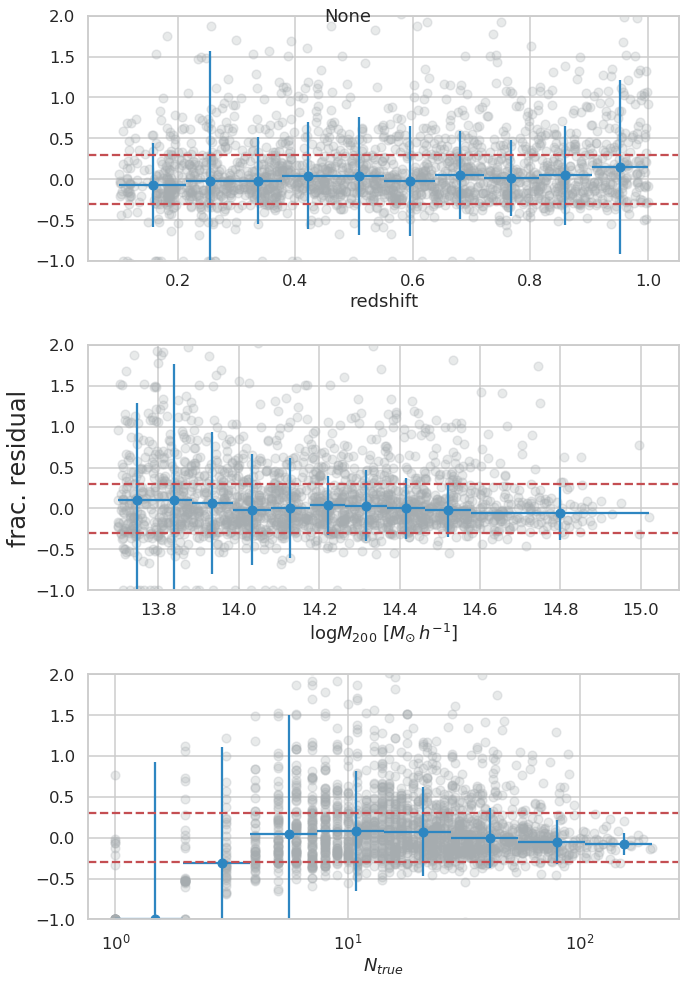

In [156]:
yvar1=d['Ngals']
yvar2= d['Ngals_true']
logm = np.log10(d['M200_true'])
zcls = d['redshift']
ntru = d['Ngals_true']

ymin,ymax = -1.,2.

ngbins = np.logspace(np.min(np.log10(yvar2)),np.max(np.log10(yvar2)),9)
mbins = np.logspace(np.min(logm),np.max(logm),9)

ylabel=r'frac. residual'
fig, ax = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plot_residual(zcls,yvar1,yvar2,ax=ax[0])
plot_residual(ntru,yvar1,yvar2,ax=ax[2],xlabel=r'$N_{true}$',xbins=ngbins)
plot_residual(logm,yvar1,yvar2,ax=ax[1],xlabel=r'$\log{M_{200}}$ [$M_{\odot}\, h^{-1}$]')

# ax[0].set_title(r'$r_{200,HOD}-r_{200}$ [Mpc $h^{-1}$]',fontsize=18)
# fig.text(0.01, 0.5, ylabel, ha='center', va='center', rotation='vertical',fontsize=24)
fig.suptitle(None,fontsize=18)


ax[1].set_ylabel(ylabel,fontsize=24)
ax[2].set_xscale('log')
ax[0].set_ylim(ymin,ymax)
for i in range(3):
    ax[i].axhline(0.3,color='r',linestyle='--')
    ax[i].axhline(-0.3,color='r',linestyle='--')
fig.tight_layout()
plt.savefig('fig_4b_res_nobs_ntrue_pz_005_r200hod.png',bb_box='tight')

In [39]:
import healpy as hp
def radec_pix(ra,dec,nside=1024,nest=True):
    return np.array(hp.ang2pix(nside,np.radians(90-dec),np.radians(ra),nest=True),dtype=np.int64)


In [122]:
nside=8192
ra,dec = d['RA'], d['DEC']

In [123]:
pixels = radec_pix(ra,dec,nside=nside,nest=True)

npix      = hp.nside2npix(nside)
area      = hp.nside2pixarea(nside,degrees=True)
hpxmap    = np.zeros(npix, dtype=np.int)
w, values = np.unique(pixels,return_counts=True)

values    = remove_iqr(values)
hpxmap[w] = values/area

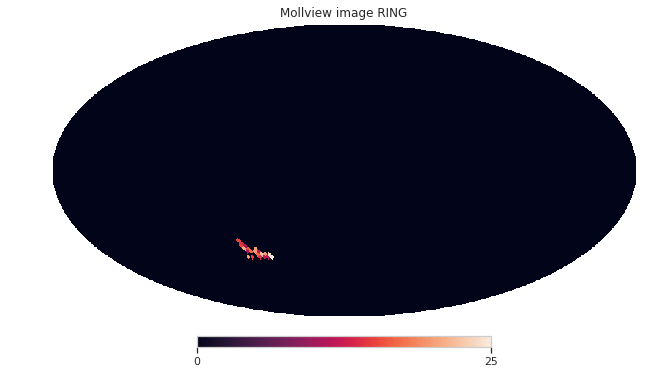

In [147]:
hp.mollview(hpxmap, title="Mollview image RING", nest=True)


In [158]:
### 3-sigma clip

def remove_iqr(values):
    q75,q25 = np.percentile(values,[75,25])
    intr_qr = q75-q25

    nmax = q75+(1.5*intr_qr)
    nmin = q25-(1.5*intr_qr)
    
    idx  = np.where((values < nmax) & (values > nmin))
    return idx

In [159]:
nmax

9.5

In [160]:
nmin

-2.5

In [161]:
values[values>nmax]

array([15, 10, 14, 20, 13, 25, 15, 11, 17, 16, 21, 15, 11, 14, 15, 12, 25,
       24, 14, 12, 22, 17, 20, 12, 20, 20, 24, 17, 22, 12, 17, 18, 21, 16,
       30, 15, 24, 24, 18, 10, 18, 19, 25, 16, 25, 19, 16, 16, 19, 12, 15,
       11, 16, 21, 12, 12, 21, 10, 13, 18, 19, 23, 10, 15, 20, 15, 13, 20,
       11, 17, 21, 15, 17, 10, 13, 12, 17, 13, 20, 12, 22, 19, 18, 11, 12,
       15, 23, 11, 18, 16, 12, 10, 12, 10, 16, 14, 13, 13, 15, 20, 12, 13,
       21, 11, 14, 16, 16, 19, 12, 10, 12, 17, 11, 14, 14, 19, 13, 12, 19,
       16, 21, 15, 13, 17])

In [162]:
2**13

8192

In [241]:
hp.nside2resol(32768,arcmin=True)*60

6.441537022157636

In [231]:
def commonValues(values):
	idx_sort = np.argsort(values)
	sorted_values = values[idx_sort]
	vals, idx_start, count = np.unique(sorted_values, return_counts=True,
                                return_index=True)

	# sets of indices
	res = np.split(idx_sort, idx_start[1:])
	#filter them with respect to their size, keeping only items occurring more than once

	vals = vals[count > 1]
	commonValuesIndicies = [ri for ri in res if ri.size>1]
	
	return commonValuesIndicies, vals

In [228]:
pz     = np.random.uniform(low=0.,high=1)*np.ones_like(ra)

array([ 9.95532187,  6.63688125,  9.29163375, 13.27376249,  8.62794562,
       16.59220312,  9.95532187,  7.30056937, 11.28269812, 10.61901   ,
       13.93745062,  9.95532187,  7.30056937,  9.29163375,  9.95532187,
        7.9642575 , 16.59220312, 15.92851499,  9.29163375,  7.9642575 ,
       14.60113874, 11.28269812, 13.27376249,  7.9642575 , 13.27376249,
       13.27376249, 15.92851499, 11.28269812, 14.60113874,  7.9642575 ,
       11.28269812, 11.94638624, 13.93745062,  5.309505  , 10.61901   ,
       19.91064374,  9.95532187, 15.92851499, 15.92851499, 11.94638624,
        6.63688125, 11.94638624, 12.61007437, 16.59220312, 10.61901   ,
        5.309505  , 16.59220312, 12.61007437, 10.61901   , 10.61901   ,
       12.61007437,  7.9642575 ,  4.64581687,  9.95532187,  7.30056937,
       10.61901   , 13.93745062,  7.9642575 ,  7.9642575 , 13.93745062,
        6.63688125,  8.62794562, 11.94638624, 12.61007437, 15.26482687,
        6.63688125,  9.95532187, 13.27376249,  9.95532187,  8.62

In [226]:
nside=32
pixels    = radec_pix(ra,dec,nside=nside,nest=True)

npix      = hp.nside2npix(nside)
hpxmap    = np.zeros(npix, dtype=np.int)
w         = np.unique(pixels)
groups    = commonValues(pixels)
pzmap     = np.array([np.sum(pz[idx]) for idx in groups])

idx            = remove_iqr(pzmap)
hpxmap[w[idx]] = pzmap[idx]

pixels_nonzero = hpxmap>0.
nbkg           = np.median(hpxmap[pixels_nonzero])
bkgIndices     = np.in1d(pixels,w[idx])

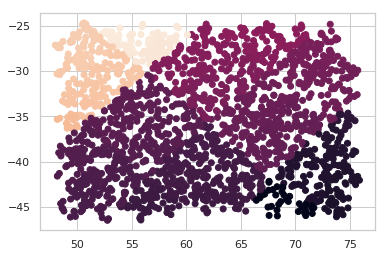

In [232]:
plt.scatter(ra,dec,c=pixels)

(array([ 0.,  1.,  0.,  0.,  1.,  5.,  8., 24., 10., 19., 11., 15.,  8.,
        15.,  3.,  6.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

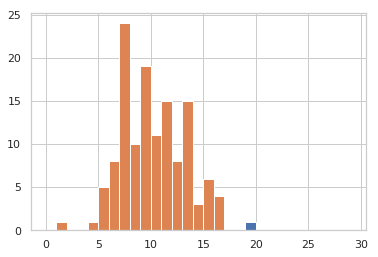

In [227]:
xbins = np.arange(0,30,1)
plt.hist(pzmap,bins=xbins)
plt.hist(pzmap[idx],bins=xbins)

In [183]:
nbkg

15.0

In [206]:
a = np.array([1,1])
w = np.array([1,0.5])

In [207]:
np.bincount(a,weights=w)

array([0. , 1.5])

In [203]:
np.unique(a)

array([1, 3])

In [325]:
d = data_rhod[2]
d1= data_rhod[1]

In [341]:
np.nanstd(d['Nbkg']/(d['Nbkg_true']+1e-9))/np.nanmean(d['Nbkg']/(d['Nbkg_true']+1e-9))

34.896512218896945

In [339]:
4*np.pi

12.566370614359172

In [328]:
d['Nbkg']

-0.007798592211502873
-0.007798592211502873
144648354.78644535
-0.007798592211502873
-0.007798592211502873
363817094.5028162
-0.007798592211502873
72143073.67815429
-0.007798592211502873
108565726.91208631
95558363.42293575


In [272]:
2*8192

16384

In [276]:
hp.nside2resol(8192,arcmin=True)

0.42943580147717575

In [290]:
13.2 - 13.2 % 2 

12.0